In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


from Lineaire.Linear import Linear
from Activation.Tanh import Tanh
from Loss.CELogSoftMax import CELogSoftMax
from Loss.CELoss import CELoss
from Activation.SoftMax import SoftMax
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD
from Encapsulation.fonctions import *

from utils import tools 

In [2]:
np.random.seed(5)

**Classification multi-classes pour reconnaitre des images de chiffres.**

### Chargement du dataset UCIML

digits.data.shape=(1797, 64)


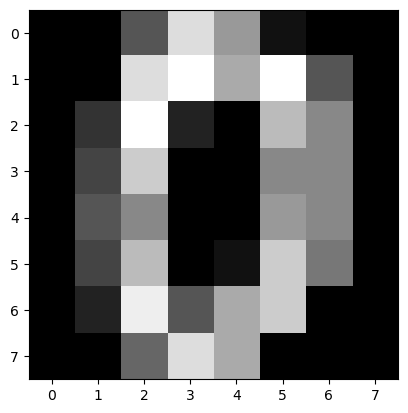

In [2]:
digits = load_digits()
print(f'{digits.data.shape=}')

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

plt.imshow(digits.images[0], cmap='grey')
plt.show()

y_train_one_hot = transform_one_hot(y_train)


# Tests

In [3]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=500, eps=1e-2, shuffle=False)


ic| X.shape: (1437, 64)
ic| Y.shape: (1437, 10)
100%|██████████| 500/500 [00:09<00:00, 53.46it/s]


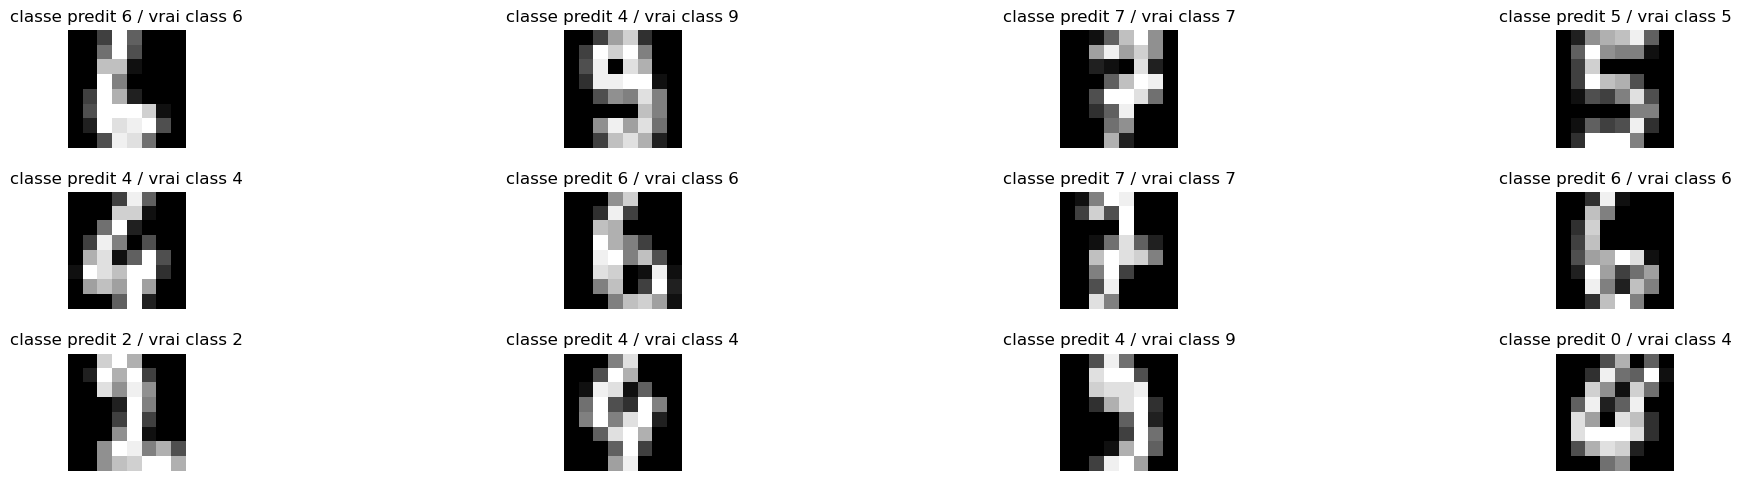

In [4]:
tools.print_image(X_test, y_test, net, 12, 8)

100%|██████████| 500/500 [00:09<00:00, 51.11it/s]


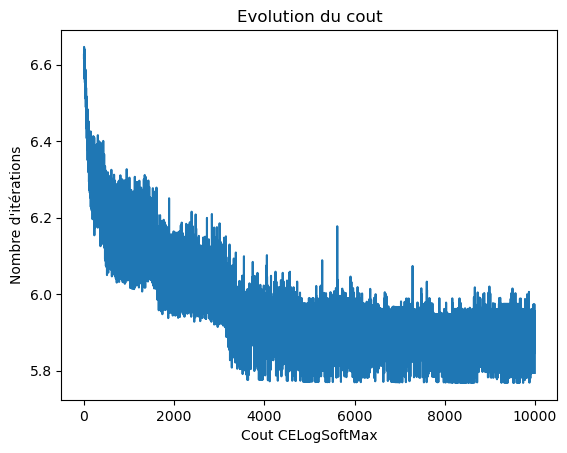

accuracy train:  0.8392484342379958
accuracy test:  0.7805555555555556


In [5]:
evaluate_bceloss(opt, X_train, X_test, y_train, y_test)

# Autres tests

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:02<00:00, 69.84it/s]


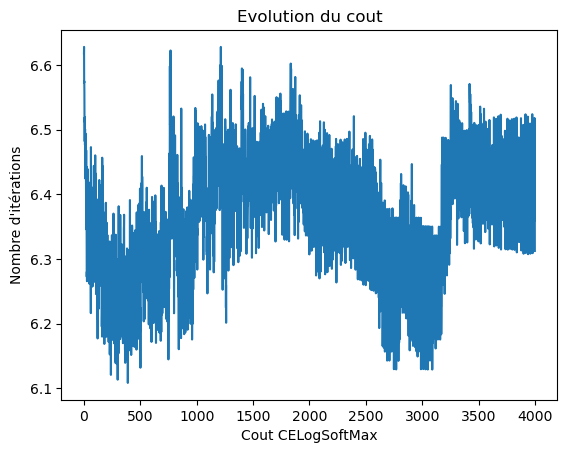

accuracy train:  0.3180236604036186
accuracy test:  0.26666666666666666


In [7]:
lineaire1 = Linear(64, 32, name='lin1')
tanh = Tanh()
lineaire2 = Linear(32, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=200, eps=1e-1, shuffle=False)

evaluate_bceloss(opt, X_train, X_test, y_train, y_test)


## Resultats faibles

ce genre de cellules n'est pas censé être exécuté car on a supprimé le reste du code

In [46]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-1

accuracy :  (457, 0.3180236604036186)


In [43]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-3

accuracy :  (705, 0.4906054279749478)


In [41]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150, eps=1e-3

accuracy :  (586, 0.4077940153096729)


In [ ]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 5

accuracy :  (1020, 0.7098121085594989)


In [ ]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 10 10 nbbatch = 10

accuracy :  (657, 0.4572025052192067)


In [ ]:
print("accuracy : ", score(y_train, raw_scores_train)) #64, 10, 10

accuracy :  (145, 0.10090466249130133)


In [ ]:
print("accuracy : ", score(y_train, raw_scores_train)) #64, 32, 10

accuracy :  (145, 0.10090466249130133)


In [ ]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 8, 10 shuffle False

accuracy :  (1206, 0.8392484342379958)


## Bons resultats

In [ ]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=200, eps=1e-2, shuffle=True)

evaluate_bceloss(opt, X_train, X_test, y_train, y_test)


In [104]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 8 10 nbbatch = 20, epoch = 150, Shuffle False
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy :  (1191, 0.8288100208768268)
accuracy test:  (283, 0.7861111111111111)


In [106]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 8 10 nbbatch = 20, epoch = 150, Shuffle False
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy :  (1172, 0.8155880306193458)
accuracy test:  (285, 0.7916666666666666)


In [78]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150, Shuffle True
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy :  (1345, 0.9359777313848295)
accuracy test:  (317, 0.8805555555555555)


In [76]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 150
print("accuracy test: ", score(y_test, raw_scores_test)) #Shuffle false

accuracy :  (1321, 0.919276270006959)
accuracy test:  (321, 0.8916666666666667)


In [102]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 200 shuffle = False
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy :  (1307, 0.9095337508698678)
accuracy test:  (322, 0.8944444444444445)


In [100]:
print("accuracy : ", score(y_train, raw_scores_train)) #64 32 10 nbbatch = 20, epoch = 200 shuffle = True
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy :  (1307, 0.9095337508698678)
accuracy test:  (314, 0.8722222222222222)


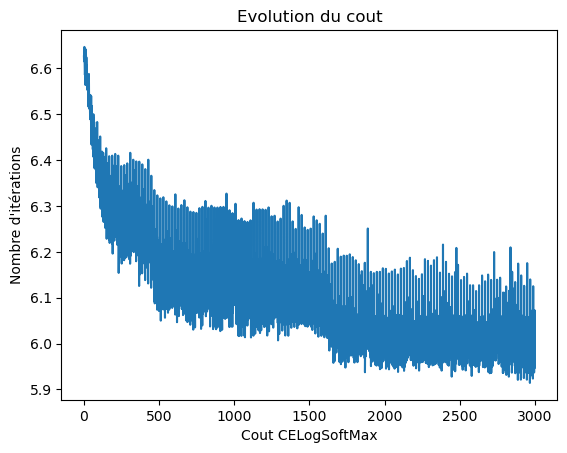

In [108]:
lineaire1 = Linear(64, 8, name='lin1')
tanh = Tanh()
lineaire2 = Linear(8, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=150, eps=1e-2, shuffle=False)

raw_scores_train, raw_scores_test = evaluate_bceloss(opt, X_train, X_test, y_train, y_test)

## Modifier nb neurones

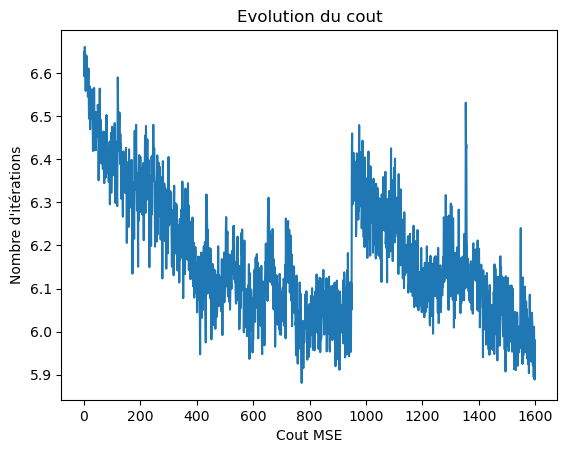

In [93]:
lineaire1 = Linear(64, 32, name='lin1')
tanh = Tanh()
lineaire2 = Linear(32, 8, name='lin1')
tanh2 = Tanh()
lineaire3 = Linear(8, 32, name='lin2')
tanh3 = Tanh()
lineaire4 = Linear(32, 10, name='lin2')
loss_celogsoftmax = CELogSoftMax()
softmax = SoftMax()

net = Sequentiel(lineaire1, tanh, lineaire2, tanh2, lineaire3, tanh3, lineaire4, softmax)

net, couts, opt = SGD(net, X_train, y_train_one_hot, nb_batch=20, loss=loss_celogsoftmax, nb_epochs=80, eps=1e-2, shuffle=True)
evaluate_bceloss(opt, X_train, X_test, y_train, y_test)

In [94]:
print("accuracy train: ", score(y_train, raw_scores_train))  # 800 epochs
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy train:  (1307, 0.9095337508698678)
accuracy test:  (269, 0.7472222222222222)


In [95]:
print("accuracy train: ", score(y_train, raw_scores_train)) #2000 epochs
print("accuracy test: ", score(y_test, raw_scores_test))

accuracy train:  (1307, 0.9095337508698678)
accuracy test:  (269, 0.7472222222222222)
